# Efficiency test of a Multi-layer Perceptron

In [7]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import tensorflow as tf
from tensorflow import keras

from keras.datasets import mnist
from keras import Model, layers

import numpy as np

import time

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# MNIST dataset parameters
num_classes = 10 # total classes (0-9 digits)
num_features = 784 # data features (img shape: 28*28)
num_epochs = 100 # no. epochs


# Network parameters
n_hidden_1 = 128 # 1st layer's no. neurons
n_hidden_2 = 256 # 2nd layer's no. neurons

In [9]:
# Function that plots figures based on the history of the training
def loss_acc_plot(history):
    plt.figure()
    plt.plot(history.history['accuracy'], label = 'Train')
    plt.plot(history.history['val_accuracy'], label = 'Validation')
    plt.legend()
    plt.title('Accuracy of train and validation sets')

    plt.figure()
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.legend()
    plt.title('Loss of train and validation sets')

    plt.show()

## Preprocessing of data

In [10]:
# Preparation of MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

## 1st Model

In [ ]:
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28 * 28, )),
    keras.layers.Dense(n_hidden_1, activation='relu'),
    keras.layers.Dense(n_hidden_2, activation='relu'),
    keras.layers.Dense(10)
])

model_1.summary()

Batch size = 1

In [ ]:
# Compile model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])

st = time.time()

history = model_1.fit(x_train, y_train, batch_size=1, epochs=num_epochs, validation_split=0.2)

end = time.time()

# Plot the diagrams
loss_acc_plot(history)

print('Training time:', end-st, 'seconds')

Batch size = 256

In [ ]:
# Compile model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])

st = time.time()

history = model_1.fit(x_train, y_train, batch_size=256, epochs=num_epochs, validation_split=0.2)

end = time.time()

# Plot the diagrams
loss_acc_plot(history)

print('Training time:', end-st, 'seconds')

Batch size = Train size

In [ ]:
# Compile model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])

st = time.time()

n_train = int(np.shape(y_train)[0]*0.8)
history = model_1.fit(x_train, y_train, batch_size=n_train, epochs=num_epochs, validation_split=0.2)

end = time.time()

# Plot the diagrams
loss_acc_plot(history)

print('Training time:', end-st, 'seconds')

RMSprop optimizer
Learning rate = 0.001
Rho = 0.01

In [ ]:
# Set optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.01)

# Compile model
model_1.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])

st = time.time()

history = model_1.fit(x_train, y_train, batch_size=256, epochs=num_epochs, validation_split=0.2)

end = time.time()

# Plot the diagrams
loss_acc_plot(history)

print('Training time:', end-st, 'seconds')

RMSprop optimizer
Learning rate = 0.001
Rho = 0.99

In [ ]:
# Set optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.99)

# Compile model
model_1.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])

st = time.time()

history = model_1.fit(x_train, y_train, batch_size=256, epochs=num_epochs, validation_split=0.2)

end = time.time()

# Plot the diagrams
loss_acc_plot(history)

print('Training time:', end-st, 'seconds')

## 2nd Model with initialization of weights

In [ ]:
# Set weight initializer
initial = keras.initializers.RandomNormal(mean=10)

model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28 * 28, )),
    keras.layers.Dense(n_hidden_1, activation='relu', kernel_initializer=initial),
    keras.layers.Dense(n_hidden_2, activation='relu', kernel_initializer=initial),
    keras.layers.Dense(10, kernel_initializer=initial)
])

model_2.summary()

In [ ]:
# Set optimizer
opt = keras.optimizers.SGD(learning_rate=0.01)

# Compile model
model_2.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics=['accuracy'])

st = time.time()

history = model_2.fit(x_train, y_train, batch_size=256, epochs=num_epochs, validation_split=0.2)

end = time.time()

# Plot the diagrams
loss_acc_plot(history)

print('Training time:', end-st, 'seconds')

## 3rd Model with L2 regularization

In [ ]:
# Set weight initializer
initial = keras.initializers.RandomNormal(mean=10)

# Regularization param
for a in [0.1, 0.01, 0.001]:

    # Set regularizer
    reg = keras.regularizers.L2(a)

    model_3 = keras.Sequential([
        keras.layers.Flatten(input_shape=(28 * 28, )),
        keras.layers.Dense(n_hidden_1, activation='relu', kernel_initializer=initial, kernel_regularizer=reg),
        keras.layers.Dense(n_hidden_2, activation='relu', kernel_initializer=initial, kernel_regularizer=reg),
        keras.layers.Dense(10, kernel_initializer=initial, kernel_regularizer=reg)
    ])

    model_3.summary()

    # Set optimizer
    opt = keras.optimizers.SGD(learning_rate=0.01)

    # Compile model
    model_3.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics=['accuracy'])

    st = time.time()

    history = model_3.fit(x_train, y_train, batch_size=256, epochs=num_epochs, validation_split=0.2)

    end = time.time()

    # Plot the diagrams
    loss_acc_plot(history)

    print('Training time:', end-st, 'seconds')

## 4th Model with L1 regularization

In [11]:
# Set weight initializer
initial = keras.initializers.RandomNormal(mean=10)

# Set regularizer
reg = keras.regularizers.L1(0.01)

model_4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28 * 28, )),
    keras.layers.Dense(n_hidden_1, activation='relu', kernel_initializer=initial, kernel_regularizer=reg),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(n_hidden_2, activation='relu', kernel_initializer=initial, kernel_regularizer=reg),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, kernel_initializer=initial, kernel_regularizer=reg)
])

model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-tr

Epoch 1/100
188/188 [==============================] - 3s 10ms/step - loss: 3730422272.0000 - accuracy: 0.1138 - val_loss: 14058602.0000 - val_accuracy: 0.1060
Epoch 2/100
188/188 [==============================] - 1s 7ms/step - loss: 14058594.0000 - accuracy: 0.1140 - val_loss: 14058596.0000 - val_accuracy: 0.1060
Epoch 3/100
188/188 [==============================] - 1s 7ms/step - loss: 14058581.0000 - accuracy: 0.1140 - val_loss: 14058581.0000 - val_accuracy: 0.1060
Epoch 4/100
188/188 [==============================] - 1s 7ms/step - loss: 14058579.0000 - accuracy: 0.1140 - val_loss: 14058567.0000 - val_accuracy: 0.1060
Epoch 5/100
188/188 [==============================] - 1s 7ms/step - loss: 14058575.0000 - accuracy: 0.1140 - val_loss: 14058562.0000 - val_accuracy: 0.1060
Epoch 6/100
188/188 [==============================] - 1s 8ms/step - loss: 14058522.0000 - accuracy: 0.1140 - val_loss: 14058555.0000 - val_accuracy: 0.1060
Epoch 7/100
188/188 [==============================] - 

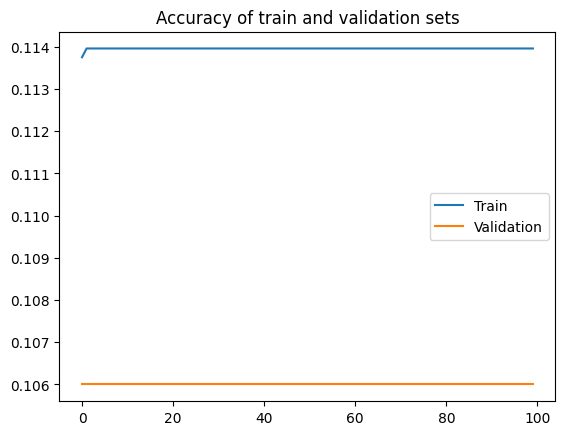

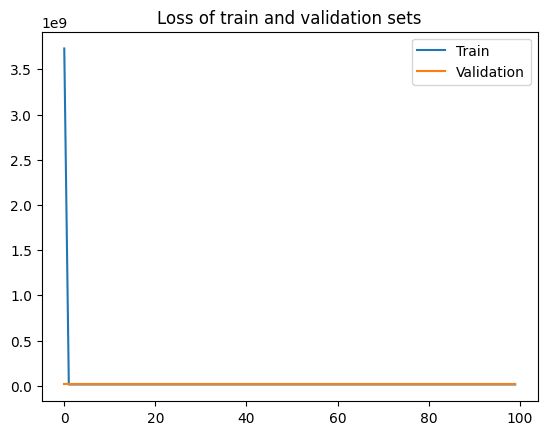

Training time: 119.73092317581177 seconds


In [12]:
# Set optimizer
opt = keras.optimizers.SGD(learning_rate=0.01)

# Compile model
model_4.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics=['accuracy'])

st = time.time()

history = model_4.fit(x_train, y_train, batch_size=256, epochs=num_epochs, validation_split=0.2)

end = time.time()

# Plot the diagrams
loss_acc_plot(history)

print('Training time:', end-st, 'seconds')